In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"C:\Users\ABHINANDAN\Desktop\data science\New folder\DSData-master\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#As mentioned in problem statement lets convert target variable into catagorical data
# quality >= 7 ===> good/1
# quality < 7 ===> not good?0
df['quality']=[1 if x>=7 else 0 for x in df.quality]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
#lets check information related to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Greate there is no null values, and the data looks good

# Visualize the data

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

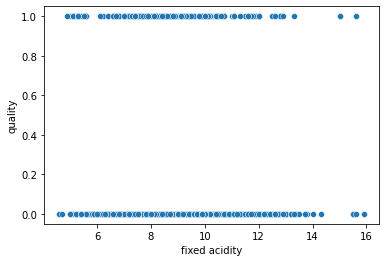

In [5]:
sns.scatterplot(x='fixed acidity',y='quality',data=df)

Acids are major wine constituents and contribute greatly to its taste.  In fact, acids impart the sourness or tartness that is a fundamental feature in wine taste.
Above plot shows different level of fixed acidity is almost present in both the cases that is good and not good wine

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

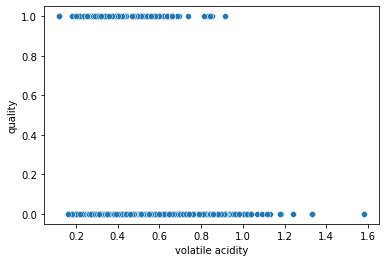

In [6]:
sns.scatterplot(x='volatile acidity',y='quality',data=df)

volatile acidity is in g/100ml unit.Wine spoilage is legally defined by volatile acidity.
Here we come to know that as volatile acidity level goes above 1 g/100ml the quality is almost not good.

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

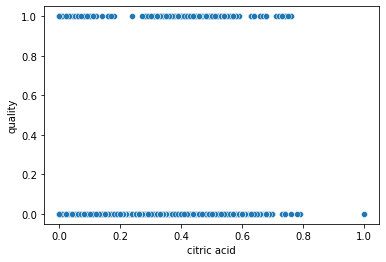

In [7]:
sns.scatterplot(x='citric acid',y='quality',data=df)

Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes.
There is presence of citric acid in both the cases, but beyond 0.8 its not good

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

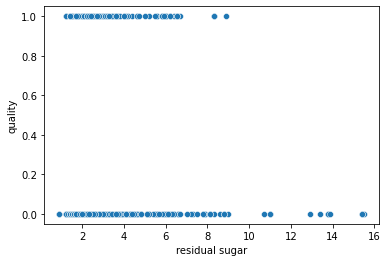

In [8]:
sns.scatterplot(x='residual sugar',y='quality',data=df)

Sweetness in wine is called residual sugar and is usually measured in grams per litre (g/L).
if the level of residual sugar increases beyond 10g/L then quality will decreases.

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

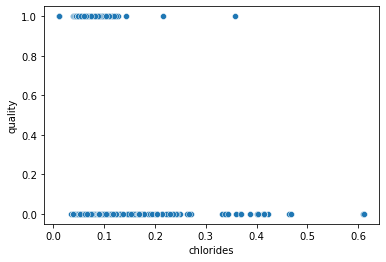

In [9]:
sns.scatterplot(x='chlorides',y='quality',data=df)

along with some organic acids, chlorides may have a key role on a potential salty taste of a wine.
If chlorides concentration goes beyond 0.3 then mostly the wine quality is not good.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

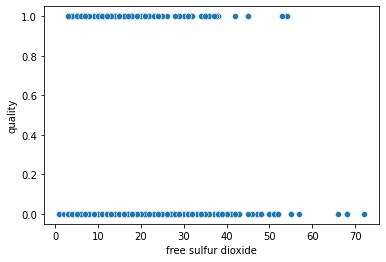

In [10]:
sns.scatterplot(x='free sulfur dioxide',y='quality',data=df)

Free SO2 is a measurement of SO2 directly in an acidic media.Sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage.
here we came to know that as the free SO2 level goes beyond 50 then quality is mostly not good.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

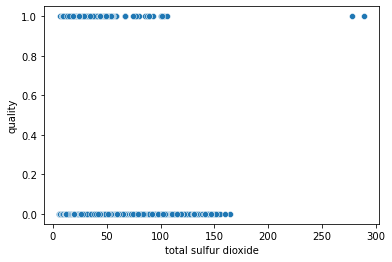

In [11]:
sns.scatterplot(x='total sulfur dioxide',y='quality',data=df)

 Total SO2 is the sum of the free SO2 with the combined SO2.

<AxesSubplot:xlabel='density', ylabel='quality'>

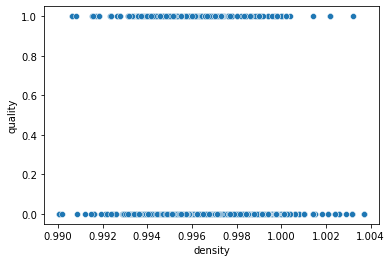

In [12]:
sns.scatterplot(x='density',y='quality',data=df)

density of redwine is given in g/ml. mostly the wine quality is good in the range 0.99 to 1.00 g/ml of density.

<AxesSubplot:xlabel='pH', ylabel='quality'>

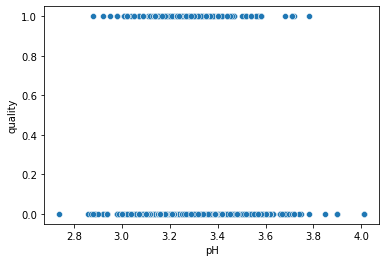

In [13]:
sns.scatterplot(x='pH',y='quality',data=df)

pH value indicates the acidic nature of wine. As the pH value goes beyond 3.8 the wine quality is not good.

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

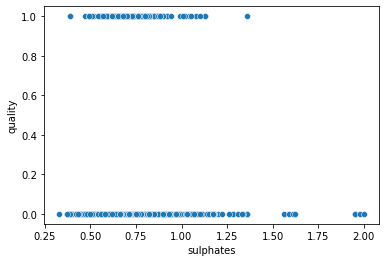

In [14]:
sns.scatterplot(x='sulphates',y='quality',data=df)

Sulphates are a food preservative widely used in winemaking,they maintain the flavor and freshness of wine.
wine quality is good mostly in the range of 0.3 to 1.20 of sulphates.

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

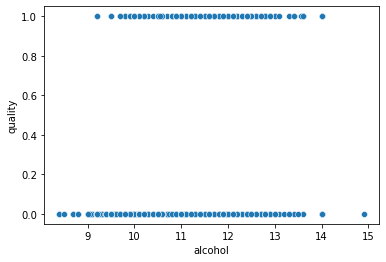

In [15]:
sns.scatterplot(x='alcohol',y='quality',data=df)

The alcohol content usually ranges from 12–15%. Consuming moderate amounts of red wine has been shown to have health benefits.
In our dataset the wine with 9.5% to 14% of alcohol concentration is considered as of good quality.

# Check Multi-collinearity

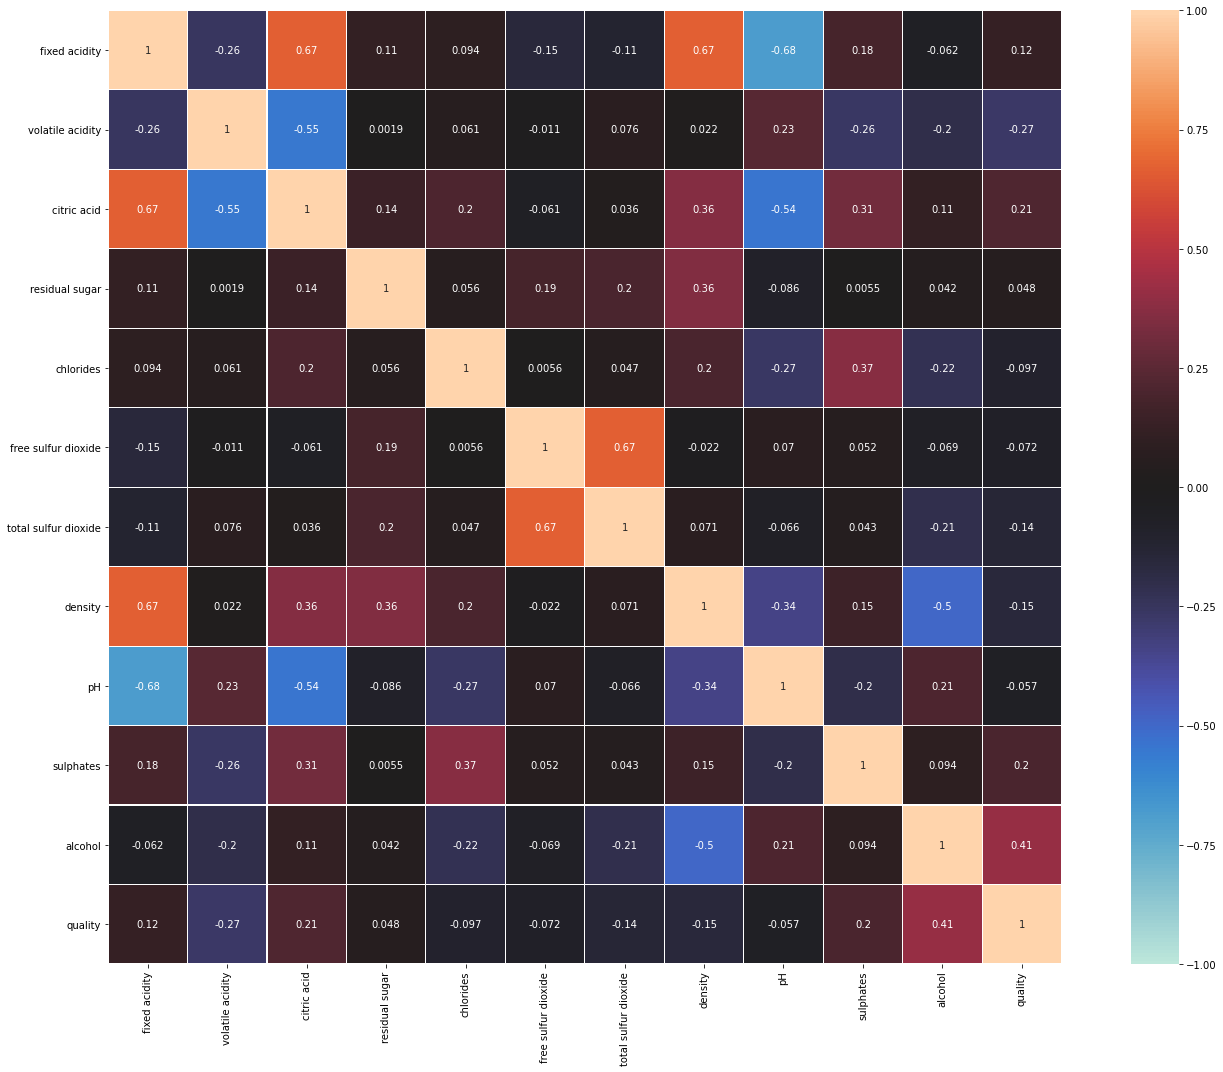

In [16]:
#Plotting Heatmap(Correlation matrix)
df_corr = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

By observing above heatmap we came to know that features like fixed acidity, residual sugar, chlorides, free sulfur dioxide, pH are very less coefficiennt of correlation with quality, we can drop these columns.
But there are only 12 features hence we will check the accuracy of model without dropping them.

In [17]:
#lets have a look on data set
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


it seems there is more skewed data in residual sugar, free sulfur dioxide and total sulfur dioxide.
we will remove outliers from these columns using zscore

In [18]:
#apply zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[[ 'residual sugar','free sulfur dioxide', 'total sulfur dioxide']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


by removing outliers from mentioned columns there is 3-4% of loss in data, which is acceptable.

In [19]:
#lets divide the dataset into input and output dataset
x=df.drop(columns=["quality"])
y=df[["quality"]]

In [20]:
#Lets chcek the target variable value counts
df["quality"].value_counts()

0    1332
1     212
Name: quality, dtype: int64

In [21]:
#it looks the data is imbalance
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over, = SM.fit_resample(x,y)

# Finding best random_state

In [22]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.8573573573573574 on Random State 126


In [23]:
#lets train test the data with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = max_rs )

In [24]:
#model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8573573573573574
[[272  51]
 [ 44 299]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       323
           1       0.85      0.87      0.86       343

    accuracy                           0.86       666
   macro avg       0.86      0.86      0.86       666
weighted avg       0.86      0.86      0.86       666



In [25]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

0.9009009009009009
[[289  34]
 [ 32 311]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       323
           1       0.90      0.91      0.90       343

    accuracy                           0.90       666
   macro avg       0.90      0.90      0.90       666
weighted avg       0.90      0.90      0.90       666



In [26]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.9579579579579579
[[300  23]
 [  5 338]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       323
           1       0.94      0.99      0.96       343

    accuracy                           0.96       666
   macro avg       0.96      0.96      0.96       666
weighted avg       0.96      0.96      0.96       666



In [27]:
#model with SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = rf.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))


0.9579579579579579
[[300  23]
 [  5 338]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       323
           1       0.94      0.99      0.96       343

    accuracy                           0.96       666
   macro avg       0.96      0.96      0.96       666
weighted avg       0.96      0.96      0.96       666



We are getting highest accuracy of about 94% for 2 models. it seems these algorithms overfitting, let's do cross validation

In [28]:
#Let's check cross validation score for all algorithms
#for LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(LR, x_over, y_over, cv=5)
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.8074348629547602


In [29]:
#Let's check cross validation score for DecisionTreeClassifier
scores = cross_val_score(dt, x_over, y_over, cv=5)
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.8693711295123363


In [30]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, x_over, y_over, cv=5)
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.9042792252676719


In [31]:
#Let's check cross validation score for SVC
scores = cross_val_score(svc, x_over, y_over, cv=5)
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.7372321516737435


From cross validation we can conclude that RandomForestClassifier adn LogisticRegression are giving almost same difference from accuracy of arround 0.05. By this we can conclude both the models are good. lets check model performance by using roc_auc_curve

# ROC & AUC Curve

In [32]:
#Lets find roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
roc_auc_score(y_test, LR.predict(x_test))

0.8569126898879853

In [33]:
roc_auc_score(y_test, dt.predict(x_test)) #DecesionTreeClassifier

0.9007211907319318

In [34]:
roc_auc_score(y_test, rf.predict(x_test))  #RandomForestClassifier

0.957107655092112

In [35]:
roc_auc_score(y_test, svc.predict(x_test))  #SVC

0.7680320248400112

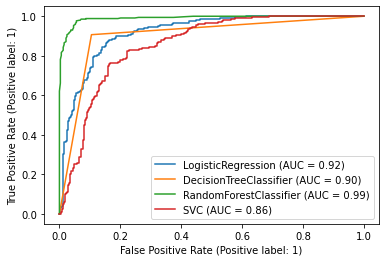

In [36]:
#Check ROC AUC for all models
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

By seeing above roc curve and auc value we can conclude the RandomForestClassifier algorithm gives best performance among all.
So we select RandomForestClassifier for our model

# Hyperparameter Tuning

In [37]:
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [5,9,10,12,15],
                'n_estimators':[200,500,700],
                'max_features':['aoto','sqrt','log2']
                }

In [38]:
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 9, 10, 12, 15],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 700]})

In [40]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [41]:
#Let's train and test our model using best parameters
model = RandomForestClassifier(criterion='gini', max_depth=15, max_features='sqrt', n_estimators=500)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 95.1951951951952%
---------------------------------------------------
Confusion Matrix : 
 [[296  27]
 [  5 338]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       323
           1       0.93      0.99      0.95       343

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666



Greate Our model is giving 95% of accuracy after hyperparameter tuning

# Saving the model

In [42]:
import joblib
joblib.dump(model,"Red_wine.pkl")

['Red_wine.pkl']